## 최종 주제. CLIP을 활용한 Few-Shot 학습에서 Support 이미지의 다양성 확장을 통한 성능 향상



2021100019 컴퓨터학과 양은서

In [21]:
!cd coco_dataset && wget http://images.cocodataset.org/zips/train2017.zip
!cd coco_dataset && unzip train2017.zip
!cd coco_dataset && wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!cd coco_dataset && unzip annotations_trainval2017.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: train2017/000000110997.jpg  
 extracting: train2017/000000424728.jpg  
 extracting: train2017/000000384745.jpg  
 extracting: train2017/000000475535.jpg  
 extracting: train2017/000000252604.jpg  
 extracting: train2017/000000002525.jpg  
 extracting: train2017/000000547307.jpg  
 extracting: train2017/000000546568.jpg  
 extracting: train2017/000000002024.jpg  
 extracting: train2017/000000162559.jpg  
 extracting: train2017/000000395397.jpg  
 extracting: train2017/000000255134.jpg  
 extracting: train2017/000000549188.jpg  
 extracting: train2017/000000383267.jpg  
 extracting: train2017/000000439710.jpg  
 extracting: train2017/000000041920.jpg  
 extracting: train2017/000000135984.jpg  
 extracting: train2017/000000530786.jpg  
 extracting: train2017/000000439236.jpg  
 extracting: train2017/000000485526.jpg  
 extracting: train2017/000000384625.jpg  
 extracting: train2017/000000369986.jpg  
 extracting: train2017/000000348913.jpg 

In [2]:
!rm -rf coco_dataset/annotations
!rm -rf coco_dataset/train2017

In [3]:
!mkdir coco_dataset
!cd coco_dataset && wget http://images.cocodataset.org/zips/val2017.zip
!cd coco_dataset && unzip val2017.zip
!cd coco_dataset && wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!cd coco_dataset && unzip annotations_trainval2017.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/000000197004.jpg  
 extracting: val2017/000000526751.jpg  
 extracting: val2017/000000041488.jpg  
 extracting: val2017/000000153632.jpg  
 extracting: val2017/000000501523.jpg  
 extracting: val2017/000000405691.jpg  
 extracting: val2017/000000040757.jpg  
 extracting: val2017/000000219485.jpg  
 extracting: val2017/000000428280.jpg  
 extracting: val2017/000000209222.jpg  
 extracting: val2017/000000353051.jpg  
 extracting: val2017/000000191471.jpg  
 ext

In [4]:
!cd coco_dataset && wget http://images.cocodataset.org/zips/test2017.zip
!cd coco_dataset && unzip test2017.zip
!cd coco_dataset && wget http://images.cocodataset.org/annotations/image_info_test2017.zip
!cd coco_dataset && unzip image_info_test2017.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: test2017/000000541512.jpg  
 extracting: test2017/000000395525.jpg  
 extracting: test2017/000000235435.jpg  
 extracting: test2017/000000069964.jpg  
 extracting: test2017/000000131962.jpg  
 extracting: test2017/000000281392.jpg  
 extracting: test2017/000000534893.jpg  
 extracting: test2017/000000128676.jpg  
 extracting: test2017/000000187639.jpg  
 extracting: test2017/000000153095.jpg  
 extracting: test2017/000000151361.jpg  
 extracting: test2017/000000067484.jpg  
 extracting: test2017/000000358618.jpg  
 extracting: test2017/000000236877.jpg  
 extracting: test2017/000000151014.jpg  
 extracting: test2017/000000351896.jpg  
 extracting: test2017/000000320687.jpg  
 extracting: test2017/000000396067.jpg  
 extracting: test2017/000000318429.jpg  
 extracting: test2017/000000381787.jpg  
 extracting: test2017/000000287482.jpg  
 extracting: test2017/000000459614.jpg  
 extracting: test2017/000000010879.jpg  
 extracting: test2017

In [5]:
!pip install torch torchvision
!pip install opencv-python
!pip install numpy
!pip install transformers
!pip install git+https://github.com/openai/CLIP.git
!pip install pycocotools

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-hs4o8p_r
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-hs4o8p_r
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.7 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=de4593170c389d0976f21299095616fd1e452a12f8be6122a33eb30b55f68658
  Stored in directory: /tmp/pip-ephem-wheel-cache-78wl6310/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [6]:
import torch
from torchvision.transforms import (
    RandomResizedCrop, RandomHorizontalFlip, ColorJitter, Normalize, ToTensor, Compose, Resize
)
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from transformers import CLIPModel, CLIPProcessor
import matplotlib.pyplot as plt
import numpy as np
from torchvision.datasets import CocoDetection

# CLIP 모델 초기화
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# 데이터 증강 정의
augmentation = Compose([
    RandomResizedCrop(224),
    RandomHorizontalFlip(),
    ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    ToTensor(),
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def denormalize(image_tensor):
    mean = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)
    std = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)
    return image_tensor * std + mean

def augment_support_set(image_path, num_variations=5):
    original_image = Image.open(image_path).convert("RGB")
    augmented_images = []
    for _ in range(num_variations):
        augmented_image = augmentation(original_image)
        denormalized_image = denormalize(augmented_image)
        augmented_images.append(denormalized_image)
    return augmented_images

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

In [7]:
# 텍스트 토큰화 및 특징 벡터 추출
def get_text_features(text_prompts, processor, model, device):
    """
    텍스트 프롬프트를 CLIP 모델의 텍스트 인코더를 통해 특징 벡터로 변환
    Args:
        text_prompts (List[str]): 텍스트 프롬프트 리스트
        processor (CLIPProcessor): CLIP 모델의 Processor
        model (CLIPModel): CLIP 모델 객체
        device (str): "cuda" 또는 "cpu"
    Returns:
        Tensor: 텍스트 특징 벡터
    """
    # 텍스트 토큰화
    text_inputs = processor(text=text_prompts, return_tensors="pt", padding=True).to(device)

    # 텍스트 특징 벡터 추출
    with torch.no_grad():
        text_features = model.get_text_features(
            text_inputs["input_ids"],
            text_inputs["attention_mask"]
        )
    return text_features

In [8]:
def few_shot_learning(support_images, support_texts, query_images, query_labels):
    predictions = []
    for query_image in query_images:
        query_input = processor(images=query_image, text=None, return_tensors="pt").to(device)
        with torch.no_grad():
            query_feature = model.get_image_features(query_input["pixel_values"])

        if support_images:
            support_inputs = processor(
                text=support_texts,
                images=support_images,
                return_tensors="pt",
                padding=True
            ).to(device)
            with torch.no_grad():
                text_features = model.get_text_features(support_inputs["input_ids"], support_inputs["attention_mask"])
        else:
            text_inputs = processor(
                text=support_texts,
                return_tensors="pt",
                padding=True
            ).to(device)
            with torch.no_grad():
                text_features = model.get_text_features(text_inputs["input_ids"], text_inputs["attention_mask"])

        # 유사도 계산과 관련된 부분
        logits = query_feature @ text_features.T / model.logit_scale.exp()
        predicted_index = logits.argmax(dim=1).item()
        predictions.append(predicted_index)

        # 예측 결과와 실제 레이블 확인
        print("Predictions:", predictions)
        print("Query Labels:", query_labels)

    accuracy = accuracy_score(query_labels, predictions)
    return accuracy, predictions

In [9]:
def calculate_prototypes(support_images, support_labels):
    prototypes = {}
    for label in set(support_labels):
        label_images = [img for img, lbl in zip(support_images, support_labels) if lbl == label]
        inputs = processor(images=label_images, return_tensors="pt", padding=True).to(device)

        with torch.no_grad():
            features = model.get_image_features(inputs["pixel_values"])

        prototypes[label] = features.mean(dim=0).cpu().numpy()
    return prototypes

def zero_shot_learning(query_images, query_labels, class_labels):
    predictions = []

    # Prepare text embeddings for all classes
    text_inputs = processor(
        text=class_labels,
        return_tensors="pt",
        padding=True
    ).to(device)

    with torch.no_grad():
        text_features = model.get_text_features(
            text_inputs["input_ids"],
            text_inputs["attention_mask"]
        )

    for query_image in query_images:
        # Prepare query image
        query_input = processor(images=query_image, return_tensors="pt").to(device)

        with torch.no_grad():
            query_feature = model.get_image_features(query_input["pixel_values"])

        # Calculate similarities
        logits = (query_feature @ text_features.T) / model.logit_scale.exp()
        predicted_index = logits.argmax(dim=1).item()
        predictions.append(predicted_index)

    accuracy = accuracy_score(query_labels, predictions)
    return accuracy, predictions

def few_shot_with_prototypes(prototypes, query_image):
    inputs = processor(images=query_image, return_tensors="pt").to(device)
    with torch.no_grad():
        query_feature = model.get_image_features(inputs["pixel_values"]).cpu().numpy()

    similarities = {label: np.dot(query_feature, proto) / (np.linalg.norm(query_feature) * np.linalg.norm(proto))
                    for label, proto in prototypes.items()}
    predicted_label = max(similarities, key=similarities.get)
    return predicted_label

def calculate_metrics(true_labels, predictions, label_names):
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average="weighted")
    recall = recall_score(true_labels, predictions, average="weighted")
    f1 = f1_score(true_labels, predictions, average="weighted")
    cm = confusion_matrix(true_labels, predictions)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print("Confusion Matrix:")
    print(cm)

In [10]:
from torchvision.datasets import CocoDetection
from torchvision.transforms import Compose, Resize, ToTensor

# COCO Dataset 경로 설정
coco_root = "./coco_dataset"
train_images_path = f"{coco_root}/val2017"
annotations_path = f"{coco_root}/annotations/instances_val2017.json"

# COCO Dataset 로드
coco_dataset = CocoDetection(
    root=train_images_path,
    annFile=annotations_path,
    transform=Compose([Resize((224, 224)), ToTensor()])
)

print(f"COCO Dataset Loaded: {len(coco_dataset)} images available.")

loading annotations into memory...
Done (t=3.38s)
creating index...
index created!
COCO Dataset Loaded: 5000 images available.


Annotations: [{'segmentation': [[240.86, 211.31, 240.16, 197.19, 236.98, 192.26, 237.34, 187.67, 245.8, 188.02, 243.33, 176.02, 250.39, 186.96, 251.8, 166.85, 255.33, 142.51, 253.21, 190.49, 261.68, 183.08, 258.86, 191.2, 260.98, 206.37, 254.63, 199.66, 252.51, 201.78, 251.8, 212.01]], 'area': 531.8071000000001, 'iscrowd': 0, 'image_id': 139, 'bbox': [236.98, 142.51, 24.7, 69.5], 'category_id': 64, 'id': 26547}, {'segmentation': [[9.66, 167.76, 156.35, 173.04, 153.71, 256.48, 82.56, 262.63, 7.03, 260.87]], 'area': 13244.657700000002, 'iscrowd': 0, 'image_id': 139, 'bbox': [7.03, 167.76, 149.32, 94.87], 'category_id': 72, 'id': 34646}, {'segmentation': [[563.33, 209.19, 637.69, 209.19, 638.56, 287.92, 557.21, 280.04]], 'area': 5833.117949999999, 'iscrowd': 0, 'image_id': 139, 'bbox': [557.21, 209.19, 81.35, 78.73], 'category_id': 72, 'id': 35802}, {'segmentation': [[368.16, 252.94, 383.77, 255.69, 384.69, 235.49, 389.28, 226.31, 392.03, 219.89, 413.15, 218.05, 411.31, 241.92, 411.31, 25

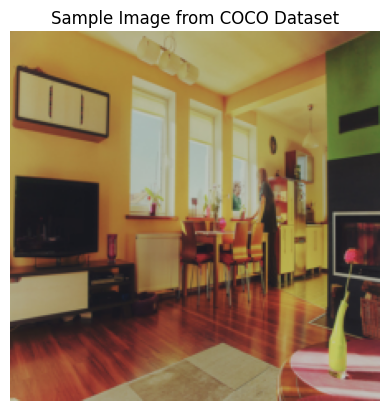

In [11]:
import matplotlib.pyplot as plt

# 샘플 이미지와 주석 확인
image, annotations = coco_dataset[0]
print(f"Annotations: {annotations}")

# 이미지 시각화
plt.imshow(image.permute(1, 2, 0))  # 채널 순서 변경
plt.title("Sample Image from COCO Dataset")
plt.axis("off")
plt.show()

In [12]:
def filter_coco_by_category(coco, category_name, num_samples):
    category_ids = coco.getCatIds(catNms=[category_name])
    image_ids = coco.getImgIds(catIds=category_ids)
    filtered_images = []
    for img_id in image_ids[:num_samples]:
        img_info = coco.loadImgs(img_id)[0]
        img_path = f"{train_images_path}/{img_info['file_name']}"
        filtered_images.append(img_path)
    return filtered_images

### Baseline: Zero-Shot Learning

In [13]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CocoCaptions
from torchvision import transforms
import clip
from sklearn.metrics import precision_score, recall_score, accuracy_score

# 1. COCO Dataset 준비
coco_root = "./coco_dataset"  # COCO 데이터셋 경로
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
])

# Collate function 정의
def collate_fn(batch):
    images, captions = zip(*batch)
    return torch.stack([transform(img) for img in images]), captions

# COCO Captions dataset
val_dataset = CocoCaptions(
    root=f"{coco_root}/val2017",
    annFile=f"{coco_root}/annotations/captions_val2017.json",
    transform=None  # Transform은 collate_fn에서 처리
)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False, collate_fn=collate_fn)

# 2. CLIP 모델 준비
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 3. COCO 데이터의 라벨 정의
categories = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]
text_inputs = torch.cat([clip.tokenize(f"a photo of a {category}") for category in categories]).to(device)

# 4. Validation 셋에서 성능 평가
model.eval()
results = []

true_labels = []
predicted_labels = []

for images, captions in val_loader:
    images = images.to(device)

    with torch.no_grad():
        # 이미지와 텍스트 인코딩
        image_features = model.encode_image(images)
        text_features = model.encode_text(text_inputs)

        # 유사도 계산
        logits_per_image = image_features @ text_features.T
        probs = logits_per_image.softmax(dim=-1).cpu().numpy()

        # 가장 높은 확률을 가진 클래스 예측
        predictions = probs.argmax(axis=1)
        batch_predicted_labels = [categories[pred] for pred in predictions]

    # 실제 라벨 추출
    for idx, caption_set in enumerate(captions):
        true_label = None
        for category in categories:
            if category in " ".join(caption_set).lower():
                true_label = category
                break
        if true_label is None:
            true_label = "unknown"

        true_labels.append(true_label)
        predicted_labels.append(batch_predicted_labels[idx])
        results.append((caption_set, true_label, batch_predicted_labels[idx]))

# 5. 정확도, Precision, Recall 계산
# 'unknown' 라벨 제거 후 계산
valid_indices = [i for i, label in enumerate(true_labels) if label in categories]
filtered_true_labels = [true_labels[i] for i in valid_indices]
filtered_predicted_labels = [predicted_labels[i] for i in valid_indices]

accuracy = accuracy_score(filtered_true_labels, filtered_predicted_labels)
precision = precision_score(filtered_true_labels, filtered_predicted_labels, average="macro", zero_division=0)
recall = recall_score(filtered_true_labels, filtered_predicted_labels, average="macro", zero_division=0)

# 결과 출력
print("Results:")
for caption, true_label, pred_label in results[:10]:  # 일부 샘플만 출력
    print(f"Caption: {caption}\nTrue Label: {true_label}, Predicted Label: {pred_label}\n")

print(f"Validation Accuracy: {accuracy * 100:.2f}%")
print(f"Validation Precision: {precision * 100:.2f}%")
print(f"Validation Recall: {recall * 100:.2f}%")


loading annotations into memory...
Done (t=0.18s)
creating index...
index created!



  0%|                                               | 0.00/338M [00:00<?, ?iB/s]
  1%|▍                                     | 4.03M/338M [00:00<00:08, 42.3MiB/s]
  3%|▉                                     | 8.49M/338M [00:00<00:07, 44.7MiB/s]
  5%|█▊                                    | 16.1M/338M [00:00<00:05, 60.1MiB/s]
  6%|██▍                                   | 21.8M/338M [00:00<00:05, 58.1MiB/s]
  8%|███                                   | 27.4M/338M [00:00<00:05, 54.6MiB/s]
 10%|███▉                                  | 35.4M/338M [00:00<00:04, 64.1MiB/s]
 12%|████▋                                 | 41.6M/338M [00:00<00:06, 49.5MiB/s]
 14%|█████▎                                | 46.8M/338M [00:00<00:06, 49.1MiB/s]
 16%|██████                                | 53.9M/338M [00:01<00:05, 55.4MiB/s]
 18%|██████▋                               | 59.5M/338M [00:03<00:33, 8.64MiB/s]
 20%|███████▋                              | 67.9M/338M [00:03<00:21, 13.1MiB/s]
 23%|████████▉             

Results:
Caption: ['A woman stands in the dining area at the table.', 'A room with chairs, a table, and a woman in it.', 'A woman standing in a kitchen by a window', 'A person standing at a table in a room.', 'A living area with a television and a table']
True Label: person, Predicted Label: tv

Caption: ['A big burly grizzly bear is show with grass in the background.', 'The large brown bear has a black nose.', 'Closeup of a brown bear sitting in a grassy area.', 'A large bear that is sitting on grass. ', "A close up picture of a brown bear's face."]
True Label: bear, Predicted Label: bear

Caption: ['Bedroom scene with a bookcase, blue comforter and window.', 'A bedroom with a bookshelf full of books.', 'This room has a bed with blue sheets and a large bookcase', 'A bed and a mirror in a small room.', 'a bed room with a neatly made bed a window and a book shelf']
True Label: bed, Predicted Label: bed

Caption: ["A stop sign is mounted upside-down on it's post. ", 'A stop sign that is 

### Few-Shot Learning

In [15]:
from PIL import Image
import torch
import clip
from torchvision import transforms

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 미리 정의된 클래스 레이블 (텍스트 입력)
support_texts = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

# 새로운 테스트 이미지 경로
test_image_path = "./query_dog.jpg"

# 텍스트 인코딩
text_inputs = torch.cat([clip.tokenize(f"a photo of a {text}") for text in support_texts]).to(device)

# 테스트 이미지 로드 및 전처리
test_image = Image.open(test_image_path).convert("RGB")
test_image_tensor = preprocess(test_image).unsqueeze(0).to(device)

# 분류 수행
model.eval()
with torch.no_grad():
    # 이미지 및 텍스트 인코딩
    image_features = model.encode_image(test_image_tensor)
    text_features = model.encode_text(text_inputs)

    # 유사도 계산
    logits_per_image = image_features @ text_features.T
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

    # 가장 높은 확률을 가진 클래스 예측
    prediction_idx = probs.argmax(axis=1)[0]
    predicted_label = support_texts[prediction_idx]

# 결과 출력
print(f"Test Image: {test_image_path}")
print(f"Predicted Label: {predicted_label}")


Test Image: ./query_dog.jpg
Predicted Label: dog


### Few-Shot Inference

#### Visualize Support Image Augmentation

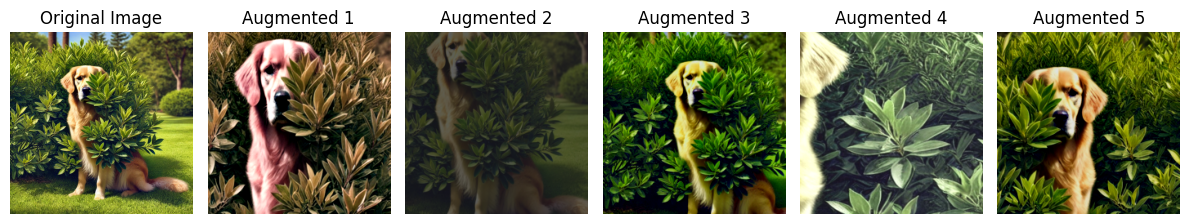

In [16]:
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms

# 지원 집합 증강 정의
augmentation = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def augment_support_set(image_path, num_variations=5):
    original_image = Image.open(image_path).convert("RGB")
    augmented_images = []
    for _ in range(num_variations):
        augmented_image = augmentation(original_image)
        augmented_images.append(augmented_image)
    return original_image, augmented_images

def denormalize(image_tensor):
    mean = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)
    std = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)
    return (image_tensor * std + mean).clamp(0, 1)

def visualize_augmented_images(original_image, augmented_images):
    # 원본 이미지 출력
    plt.figure(figsize=(12, 8))
    plt.subplot(1, len(augmented_images) + 1, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    # 증강된 이미지 출력
    for i, augmented_image in enumerate(augmented_images):
        denorm_image = denormalize(augmented_image)
        plt.subplot(1, len(augmented_images) + 1, i + 2)
        plt.imshow(denorm_image.permute(1, 2, 0).numpy())
        plt.title(f"Augmented {i + 1}")
        plt.axis("off")

    plt.tight_layout()
    plt.show()

# 실행
image_path = "./query_dog.jpg"  # Example image path
original_image, augmented_images = augment_support_set(image_path, num_variations=5)
visualize_augmented_images(original_image, augmented_images)


#### Load COCO Dataset

In [17]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import CocoCaptions
from torchvision import transforms
import clip
from PIL import Image
from pycocotools.coco import COCO

# 1. COCO Dataset 준비
coco_root = "./coco_dataset"  # COCO 데이터셋 경로
val_images_path = f"{coco_root}/val2017"
annotations_path = f"{coco_root}/annotations/instances_val2017.json"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
])

# CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

# 지원 집합 증강 정의
augmentation = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

def augment_support_set(image_path, num_variations=5):
    original_image = Image.open(image_path).convert("RGB")
    augmented_images = []
    for _ in range(num_variations):
        augmented_image = augmentation(original_image)
        augmented_images.append(augmented_image)
    return augmented_images

# COCO Dataset 로드
coco = COCO(annotations_path)
categories = [
    'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
    'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
    'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
    'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
    'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
    'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase',
    'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

loading annotations into memory...
Done (t=1.23s)
creating index...
index created!


#### Calculate Prototype Using Augmented Support Images

In [18]:
def calculate_prototypes(support_images, support_labels):
    prototypes = {}
    for label in set(support_labels):
        label_images = [img for img, lbl in zip(support_images, support_labels) if lbl == label]
        label_images = [transforms.ToPILImage()(img) for img in label_images]
        inputs = torch.stack([preprocess(img).to(device) for img in label_images])  # Preprocess support images

        with torch.no_grad():
            features = model.encode_image(inputs)

        prototypes[label] = features.mean(dim=0).cpu().detach().numpy()
    return prototypes

def few_shot_with_prototypes(prototypes, query_image):
    query_image = transforms.ToPILImage()(query_image)
    inputs = preprocess(query_image).unsqueeze(0).to(device)
    with torch.no_grad():
        query_feature = model.encode_image(inputs).cpu().detach().numpy()

    similarities = {label: np.dot(query_feature, proto) / (np.linalg.norm(query_feature) * np.linalg.norm(proto))
                    for label, proto in prototypes.items()}
    predicted_label = max(similarities, key=similarities.get)
    return predicted_label


#### Calculate Metrics With Cosine Similarity

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def calculate_metrics_with_cosine_similarity(true_labels, predictions, label_embeddings, threshold=0.8):
    correct = 0
    updated_predictions = []

    for true_label, predicted_label in zip(true_labels, predictions):
        # 임베딩 가져오기
        true_embedding = label_embeddings[true_label]
        predicted_embedding = label_embeddings[predicted_label]

        # 코사인 유사도 계산
        cos_sim = cosine_similarity([true_embedding], [predicted_embedding])[0][0]

        # 임계값 이상이면 정확한 예측으로 간주
        if cos_sim >= threshold:
            correct += 1
            updated_predictions.append(true_label)  # 코사인 유사도 기반으로 정답 처리
        else:
            updated_predictions.append(predicted_label)  # 원래 예측값 유지

    # 정확도 계산
    accuracy = correct / len(true_labels)

    # Precision, Recall, F1-Score 계산
    precision = precision_score(true_labels, updated_predictions, average="weighted")
    recall = recall_score(true_labels, updated_predictions, average="weighted")
    f1 = f1_score(true_labels, updated_predictions, average="weighted")
    cm = confusion_matrix(true_labels, updated_predictions)

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")
    print(f"F1-Score: {f1 * 100:.2f}%")
    print("Confusion Matrix:")
    print(cm)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm
    }


In [41]:
if __name__ == "__main__":
    import random
    from torchvision.transforms import Compose, Resize, ToTensor
    from torch.utils.data import DataLoader
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    from torchvision.datasets import CocoCaptions

    # COCO 데이터셋 경로 및 transform 정의
    coco_root = "coco_dataset"
    transform = Compose([Resize((224, 224)), ToTensor()])

    # COCO Captions 데이터셋 로드 (train2017 사용)
    coco_dataset = CocoCaptions(
        root=f"{coco_root}/train2017",
        annFile=f"{coco_root}/annotations/captions_train2017.json",
        transform=transform
    )

    # 지원 집합 및 쿼리 집합 생성
    random_samples = random.sample(range(len(coco_dataset)), 1500)
    support_indices = random_samples[:100]  # 지원 집합 (100개)
    query_indices = random_samples[100:]    # 쿼리 집합 (1400개)

    # 지원 이미지와 레이블 구성
    support_images = []
    support_labels = []
    for idx in support_indices:
        img, captions = coco_dataset[idx]
        support_images.append(img)
        support_labels.append(captions[0])  # 첫 번째 캡션을 레이블로 사용

    # 쿼리 이미지와 실제 레이블 구성
    query_images = []
    true_labels = []
    for idx in query_indices:
        img, captions = coco_dataset[idx]
        query_images.append(img)
        true_labels.append(captions[0])  # 첫 번째 캡션을 레이블로 사용

    # 지원 이미지에서 프로토타입 계산
    prototypes = calculate_prototypes(support_images, support_labels)

    # 쿼리 집합으로 예측
    predictions = []
    for query_image in query_images:
        predicted_label = few_shot_with_prototypes(prototypes, query_image)
        predictions.append(predicted_label)

    # 평가 지표 계산 및 출력
    # calculate_metrics_with_cosine_similarity(true_labels, predictions, label_embeddings, threshold=0.8)

loading annotations into memory...
Done (t=1.03s)
creating index...
index created!


#### Analyze Predictions

In [38]:
import pprint

label_embeddings = list(zip(true_labels, predictions))
for label, predictions in label_embeddings:
    print(f"Label: {label}, Prediction: {predictions}")


Label: A brown songbird perched on the handlebars of a bicycle., Prediction: A small airplane flying upside down through a foggy sky.
Label: A couple of large long trains on a track., Prediction: A group of people standing at a station by a train.
Label: Black and white photograph of kids in a dugout., Prediction: A child holding a bat walks back to the dugout.
Label: A large kitchen features a wood floor, white appliances and brown cabinets., Prediction: A living room filled with furniture next to a fire place.
Label: A red and yellow double decker bus parked in front of a brick building., Prediction: Large yellow commuter bus turning on a city street. 
Label: A large propeller airplane flying through the sky., Prediction: A small airplane flying upside down through a foggy sky.
Label: A skateboarder jumps over a small pole, from a fisheye lens., Prediction: A person falling off of a surfboard while other surfers watch.
Label: A air plane that has landed on a runway., Prediction: a bi

#### Calculate Similarity between Label and Predictions

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

def calculate_text_similarity(label_embeddings):
    similarities = []
    for label, prediction in label_embeddings:
        # 텍스트 임베딩 추출
        label_input = clip.tokenize([label]).to(device)
        prediction_input = clip.tokenize([prediction]).to(device)

        with torch.no_grad():
            label_embedding = model.encode_text(label_input).cpu().numpy()
            prediction_embedding = model.encode_text(prediction_input).cpu().numpy()

        # 코사인 유사도 계산
        similarity = cosine_similarity(label_embedding, prediction_embedding)[0][0]
        similarities.append((label, prediction, similarity))

    return similarities

# 유사도 계산 및 출력
label_embeddings = list(zip(true_labels, predictions))

similarities = calculate_text_similarity(label_embeddings)
for label, prediction, similarity in similarities:
    print(f"Label: {label}")
    print(f"Prediction: {prediction}")
    print(f"Cosine Similarity: {similarity:.2f}")
    print("-" * 50)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Cosine Similarity: 0.69
--------------------------------------------------
Label: The fox pup is holding something tasty to eat.
Prediction: A large brown bear walking across a lush green field.
Cosine Similarity: 0.45
--------------------------------------------------
Label: An older woman walks in the rain with her umbrella.
Prediction: A city street filled with lots of people walking in the rain.
Cosine Similarity: 0.75
--------------------------------------------------
Label: A group of people sitting around a wooden table with food.
Prediction: A woman sitting in a chair is holding a remote and a woman standing behind her is pinging to something on the remote.
Cosine Similarity: 0.65
--------------------------------------------------
Label: A court with two men playing basketball against each other.
Prediction: A professional baseball player with bat in hand warming up his swing.
Cosine Similarity: 0.67
------------------------------------------

In [50]:
def calculate_metrics_with_cosine_similarity(label_embeddings, threshold=0.65):
    correct = 0
    updated_predictions = []
    similarities = calculate_text_similarity(label_embeddings)
    for label, prediction, similarity in similarities:
        if similarity >= threshold:
            correct += 1
            updated_predictions.append(label)
        else:
            updated_predictions.append(prediction)

    accuracy = correct / len(label_embeddings)
    precision = precision_score(true_labels, updated_predictions, average="weighted")
    recall = recall_score(true_labels, updated_predictions, average="weighted")
    f1 = f1_score(true_labels, updated_predictions, average="weighted")

    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision * 100:.2f}%")
    print(f"Recall: {recall * 100:.2f}%")

    return accuracy, precision, recall

In [51]:
label_embeddings = list(zip(true_labels, predictions))

acc, prec, recall = calculate_metrics_with_cosine_similarity(label_embeddings)

Accuracy: 45.79%
Precision: 45.86%
Recall: 45.79%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Attention Map between Label and Predictions

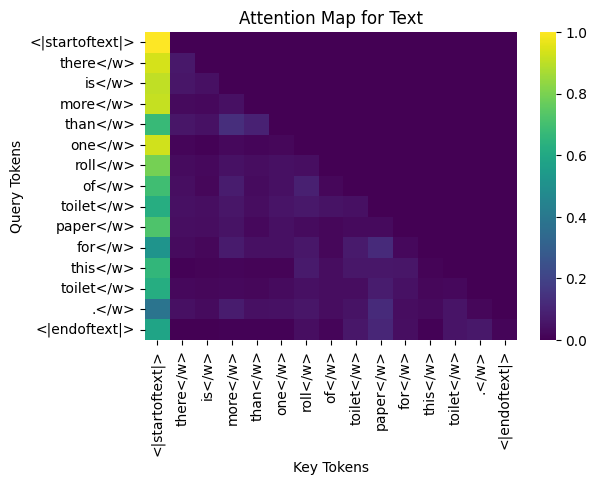

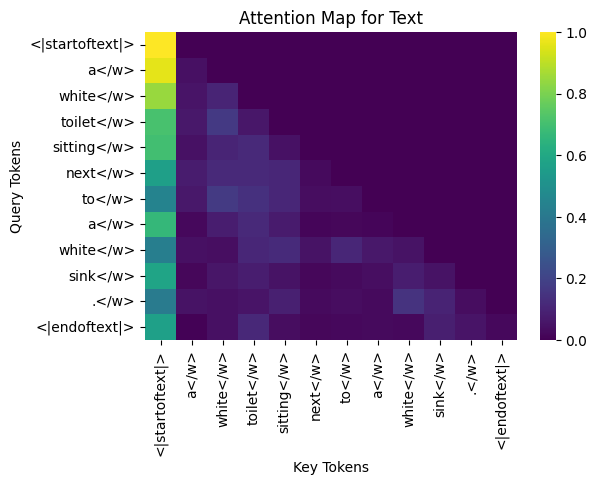

In [55]:
import torch
from transformers import CLIPTokenizer, CLIPModel
import matplotlib.pyplot as plt
import seaborn as sns

# Hugging Face CLIP 모델 로드
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

def get_text_attention_map(clip_model, tokenizer, text, device="cuda"):
    # Tokenize input text
    inputs = tokenizer(text, return_tensors="pt").to(device)

    # Forward pass with outputs including attentions
    with torch.no_grad():
        outputs = clip_model.text_model(**inputs, output_attentions=True)

    # Extract attention maps from the last layer
    attention = outputs.attentions[-1].squeeze().cpu().numpy()  # Last layer attention

    # Compute mean attention over all heads for simplicity
    mean_attention = attention.mean(axis=0)

    # Decode tokens to visualize them
    tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"].squeeze().tolist())
    return mean_attention, tokens

def plot_attention_weights(attention_map, tokens, title="Text Attention Map"):
    plt.figure(figsize=(6, 4))
    sns.heatmap(
        attention_map,
        xticklabels=tokens,
        yticklabels=tokens,
        cmap="viridis",
        cbar=True,
        annot=False
    )
    plt.title(title)
    plt.xlabel("Key Tokens")
    plt.ylabel("Query Tokens")
    plt.show()

# Example text
label = "There is more than one roll of toilet paper for this toilet. "
prediction = "A white toilet sitting next to a white sink."

for text in [label, prediction]:
    # Get attention map and tokens
    attention_map, tokens = get_text_attention_map(clip_model, tokenizer, text)

    # Plot attention map
    plot_attention_weights(attention_map, tokens, title="Attention Map for Text")
